<a href="https://colab.research.google.com/github/Yoshibansal/ML-practical/blob/main/Cat%20vs%20Dog-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Cat vs Dog part-2
(Binary class classification)

<br />

Data Augmentation

ImageDataGenerator

In part-1, the training accuracy is close to 100%, and the validation accuracy is in the 70%-80% range. That was a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't. Let's see if we can do better to avoid overfitting -- and one simple method is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too. 

What if we tweak with the images to change this up a bit -- rotate the image, squash it, etc.  That's what image augementation is all about. And there's an API that makes it easy...

Now take a look at the ImageGenerator. There are properties on it that you can use to augment the image. 

```
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```
These are just a few of the options available (for more, see the Keras documentation. Let's quickly go over what we just wrote:

* rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* shear_range is for randomly applying shearing transformations.
* zoom_range is for randomly zooming inside pictures.
* horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


Here's some code. Run it to see the impact.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-12-06 09:09:23--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 172.217.12.240, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   109MB/s    in 0.6s    

2020-12-06 09:09:24 (109 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
#importing libraries
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#unzip
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
INPUT_SHAPE = (150, 150)
MODEL_INPUT_SHAPE = INPUT_SHAPE + (3,)

#HYPERPARAMETERS
LEARNING_RATE = 1e-4
BATCH_SIZE = 20
EPOCHS = 50

In [6]:
#model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = MODEL_INPUT_SHAPE),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=LEARNING_RATE),
              metrics=['accuracy'])

In [7]:
#summary of model (including type of layer, Ouput shape and number of parameters)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

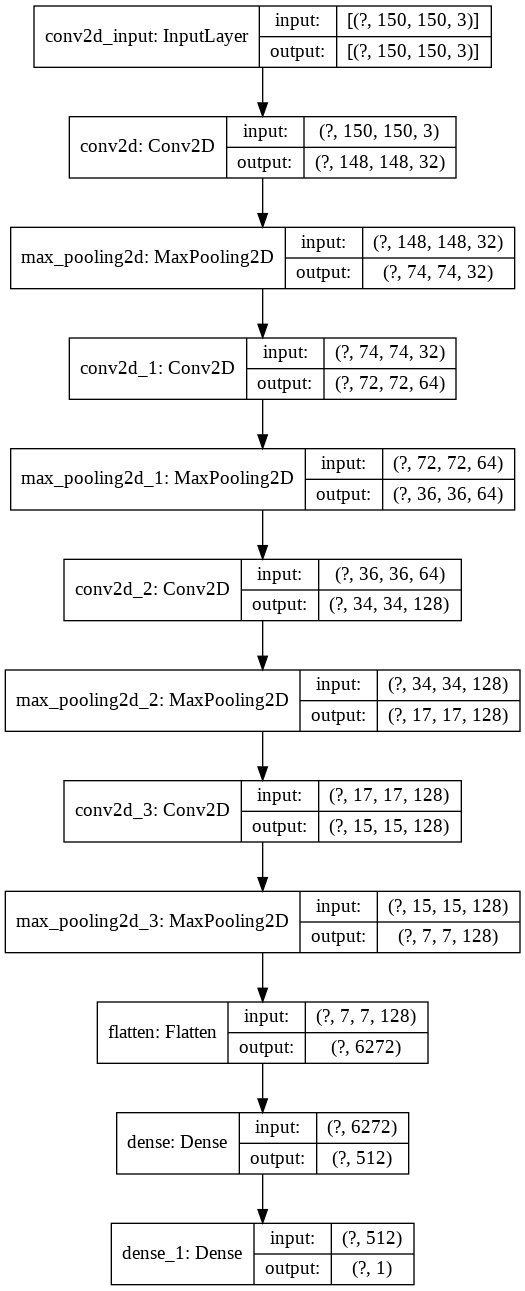

In [8]:
#plotting model and saving it architecture picture
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [9]:
'''
This code has changed. Now instead of the ImageGenerator just rescaling
the image, we also rotate and do other operations.
'''
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=INPUT_SHAPE,  # All images will be resized to 150x150
        batch_size=BATCH_SIZE,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=INPUT_SHAPE,
        batch_size=BATCH_SIZE,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
#Fitting data into model -> training model
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # steps = 2000 images / batch_size
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # steps = 1000 images / batch_size
      verbose=1)

Epoch 1/50
100/100 [==============================] - 18s 180ms/step - loss: 0.6925 - accuracy: 0.5295 - val_loss: 0.6761 - val_accuracy: 0.6140
Epoch 2/50
100/100 [==============================] - 18s 179ms/step - loss: 0.6746 - accuracy: 0.5685 - val_loss: 0.6390 - val_accuracy: 0.6340
Epoch 3/50
100/100 [==============================] - 18s 180ms/step - loss: 0.6526 - accuracy: 0.6075 - val_loss: 0.6202 - val_accuracy: 0.6460
Epoch 4/50
100/100 [==============================] - 18s 179ms/step - loss: 0.6333 - accuracy: 0.6430 - val_loss: 0.6079 - val_accuracy: 0.6410
Epoch 5/50
100/100 [==============================] - 18s 179ms/step - loss: 0.6173 - accuracy: 0.6510 - val_loss: 0.5757 - val_accuracy: 0.7020
Epoch 6/50
100/100 [==============================] - 18s 178ms/step - loss: 0.6065 - accuracy: 0.6640 - val_loss: 0.5995 - val_accuracy: 0.6700
Epoch 7/50
100/100 [==============================] - 18s 177ms/step - loss: 0.5966 - accuracy: 0.6825 - val_loss: 0.5608 - val_ac

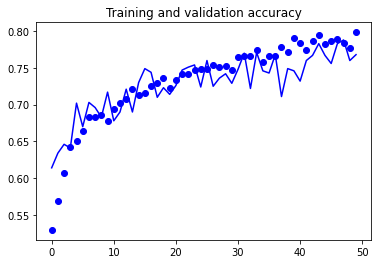

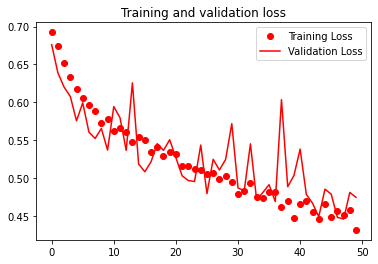

In [12]:
#PLOTTING model performance

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

I got :- accuracy: 0.7985 and val_accuracy: 0.7680

You can see that now the accuracy is close to validation accuracy ~76%. Hence solved the overfitting. Notice that the accuracy is lower than the accuracy we get in part-1. But this model is much better than that model.